In [1]:
import pyforest

In [23]:
df = pd.read_csv('bigmart_data.csv')
df

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data preprocessing

In [5]:
df.set_index('Item_Identifier', inplace=True)

In [6]:
df.drop(columns=['Outlet_Establishment_Year'], inplace=True)

In [7]:
df.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [8]:
df.shape

(8523, 10)

Handling missing values

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan,'Medium')


<IPython.core.display.Javascript object>

In [10]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

Encoding the non-numerical columns

In [12]:
# df = pd.get_dummies(df, columns=['Outlet_Size','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])

In [13]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])


In [15]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.300,1,0.016047,4,249.8092,9,1,0,1,3735.1380
DRC01,5.920,2,0.019278,14,48.2692,3,1,2,2,443.4228
FDN15,17.500,1,0.016760,10,141.6180,9,1,0,1,2097.2700
FDX07,19.200,2,0.000000,6,182.0950,0,1,2,0,732.3800
NCD19,8.930,1,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,1,0.056783,13,214.5218,1,0,2,1,2778.3834
FDS36,8.380,2,0.046982,0,108.1570,7,1,1,1,549.2850
NCJ29,10.600,1,0.035186,8,85.1224,6,2,1,1,1193.1136


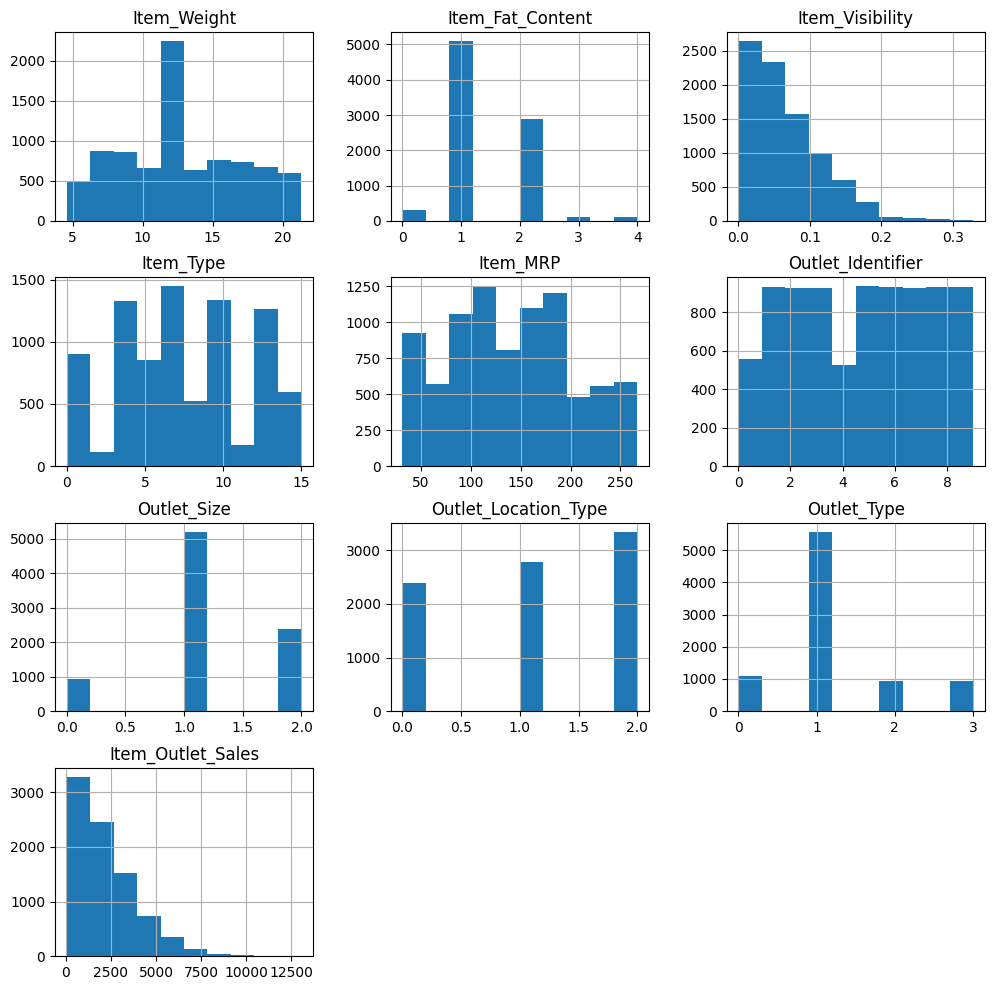

In [16]:
plot = df.hist(figsize=(12,12))

In [17]:
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [18]:
y

Item_Identifier
FDA15    3735.1380
DRC01     443.4228
FDN15    2097.2700
FDX07     732.3800
NCD19     994.7052
           ...    
FDF22    2778.3834
FDS36     549.2850
NCJ29    1193.1136
FDN46    1845.5976
DRG01     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Test Train Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR

model = RandomForestRegressor(max_depth=6)

model.fit(X_train, y_train)

print("Train accuracy: ",model.score(X_train, y_train))
print("Test accuracy: ",model.score(X_test, y_test))

Train accuracy:  0.6310468522750876
Test accuracy:  0.5794136936361393
